In [1]:
from ase.lattice.cubic import FaceCenteredCubic
from ase import Atoms

from ase.visualize import view
import numpy as np
from gpaw import restart
import matplotlib.pyplot as plt


# from mayavi import mlab

In [4]:
AL_LATTICE_CONSTANT = 4.05
al_supercell = FaceCenteredCubic("Al",
                                 size=(3, 2, 2),
                                 latticeconstant=AL_LATTICE_CONSTANT)
# al_supercell.center(vacuum=15.0, axis=0)
al_supercell.center()

projectile_starting_position = [0.0, AL_LATTICE_CONSTANT, AL_LATTICE_CONSTANT]
projectile = Atoms("H",
                   cell=al_supercell.cell,
                   positions=[projectile_starting_position])

system = al_supercell  + projectile

view(system, viewer="ngl")

In [15]:
data = {
    "iter": [],
    "energy": [],
    "eigst": [],
    "dens": [],
}

with open("output.txt", "r") as file:
    for line in file:
        if line.startswith("iter: "):
            # print(line)
            parts = line.split()
            try:

                iter = int(parts[1])
                data["iter"].append(iter)

                energy = float(parts[3].rstrip('c'))
                data["energy"].append(energy)

                eigst = float(parts[4])
                data["eigst"].append(eigst)

                dens = float(parts[5])
                data["dens"].append(dens)
                
            except (IndexError, ValueError) as e:
                print(f"Skipping malformed line: {line.strip()}")

Skipping malformed line: iter:   1 14:13:07  -202.578762


Text(0.5, 0, 'iteration')

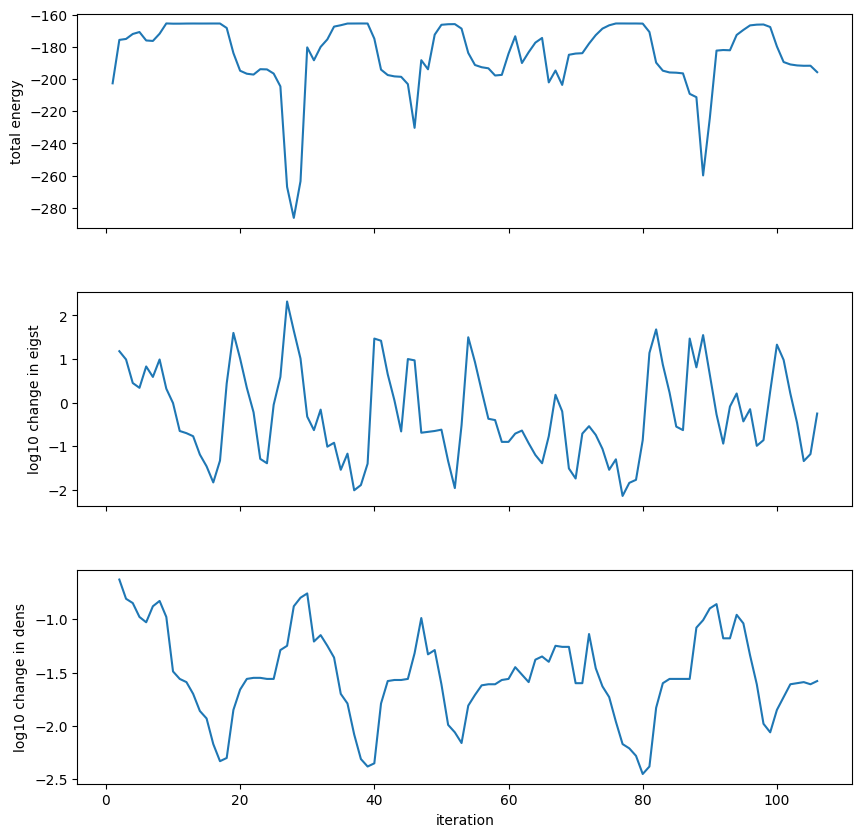

In [24]:
fig,axs = plt.subplots(3, figsize=(10,10), sharex=True)
plt.subplots_adjust(hspace=0.3)

axs[0].plot(data["iter"], data["energy"])
axs[1].plot(data["iter"][1:], data["eigst"])
axs[2].plot(data["iter"][1:], data["dens"])

axs[0].set_ylabel("total energy")
axs[1].set_ylabel("log10 change in eigst")
axs[2].set_ylabel("log10 change in dens")
axs[2].set_xlabel("iteration")